In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
def plot_sample(data,title,cbar):
    lat = np.linspace(-90, 90, 721)  # 纬度从 -90° 到 90°
    lon = np.linspace(-180, 180, 1440)  # 经度从 -180° 到 180°
    lon, lat = np.meshgrid(lon, lat)

    # 创建地图
    fig = plt.figure(figsize=(12, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())  # 使用 PlateCarree 投影（圆柱投影）

    # 绘制热力图
    heatmap = ax.pcolormesh(lon, lat, data, cmap=cbar, transform=ccrs.PlateCarree())

    # 添加国家分界线
    ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)

    # 添加颜色条
    cbar = plt.colorbar(heatmap, orientation='horizontal', pad=0.05, shrink=0.8)
    #cbar.set_label('Variable Value')

    
    plt.title(title)


    ax.set_global()  # 确保地图显示完整的全球范围
    ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')  # 添加网格线

    # 调整地图的边界
    ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())  # 设置地图范围为全球

    # 保存图像
    #plt.savefig('global_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()

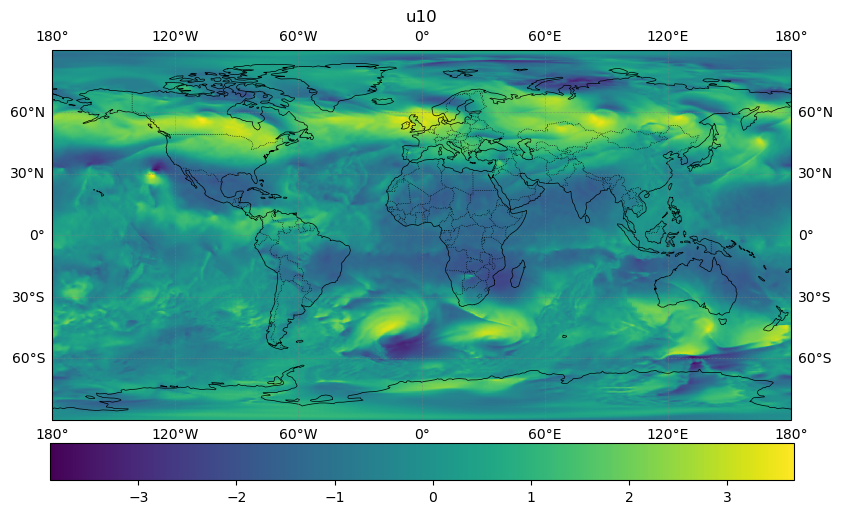

(49748, 1440)


In [3]:
data = np.array(pd.read_csv("recons_step19_2.csv"))
plot_sample(data[0:721,:],'u10','viridis')
print(data.shape)

(49748, 1440)


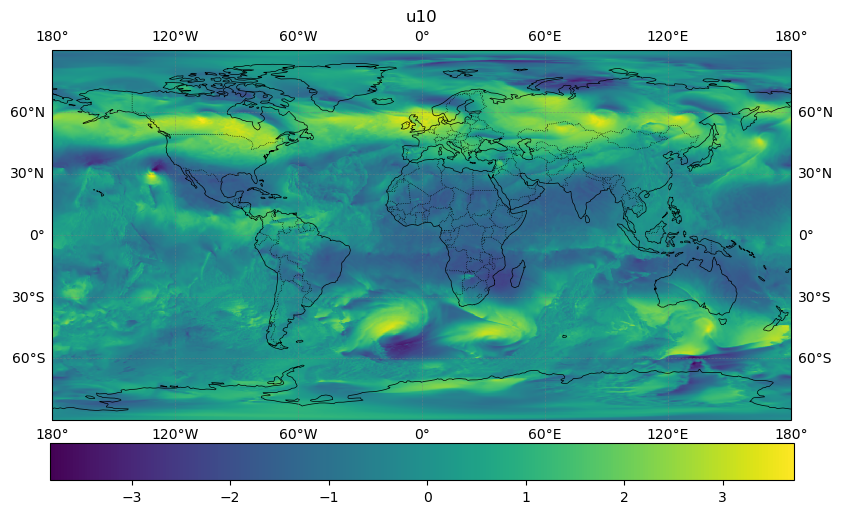

In [4]:
gtdata = np.array(pd.read_csv("truth_step19_2.csv"))
print(gtdata.shape)
plot_sample(gtdata[0:721,:],'u10','viridis')

In [ ]:
multi_level_vnames = [
    "z", "q","u","v","t"
]
single_level_vnames = ['u10', 'v10', 't2m', 'msl']

long2shortname_dict = {"geopotential": "z", "temperature": "t", "specific_humidity": "q", "relative_humidity": "r", "u_component_of_wind": "u", "v_component_of_wind": "v", "vorticity": "vo", "potential_vorticity": "pv", \
    "2m_temperature": "t2m", "10m_u_component_of_wind": "u10", "10m_v_component_of_wind": "v10", "total_cloud_cover": "tcc", "total_precipitation": "tp", "toa_incident_solar_radiation": "tisr"}

height_level = [50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 850, 925, 1000]

for i in range(len(single_level_vnames)):
    print(single_level_vnames[i])

for i in range(len(multi_level_vnames)):
    for j in range(len(height_level)):
        idx_ = i*len(height_level) + j + 4
        print(multi_level_vnames[i]+str(height_level[j]))

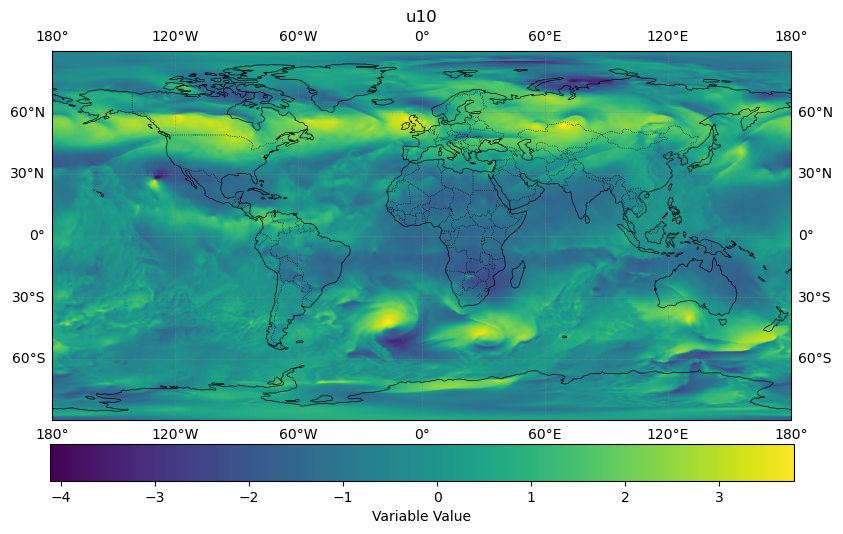

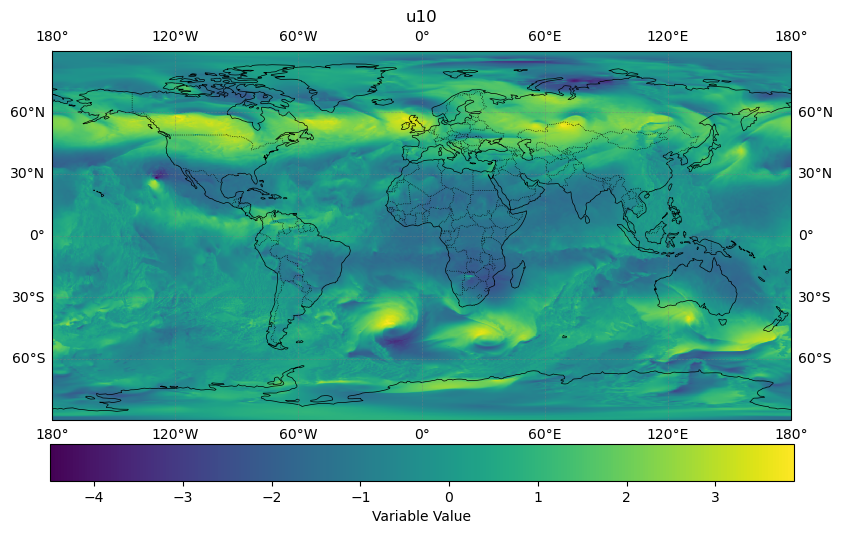

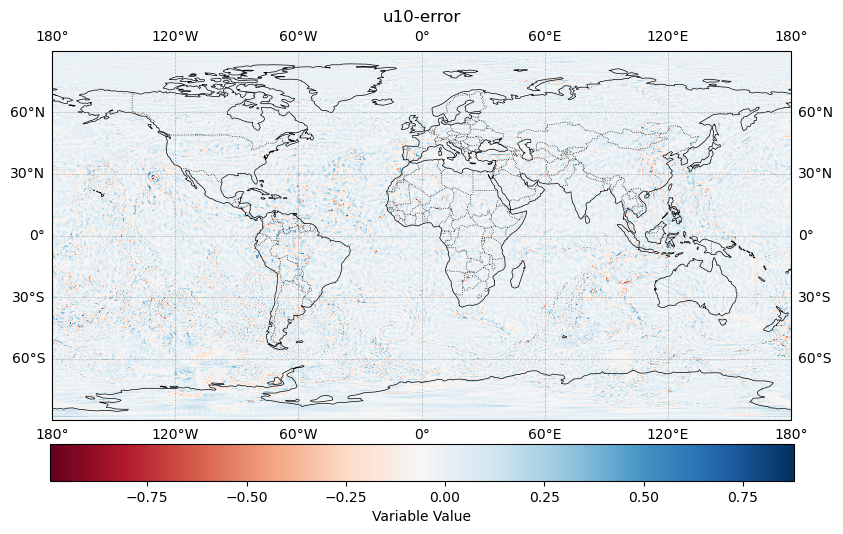

In [19]:
plot_sample(data[0:721,:],'u10','viridis')
plot_sample(gtdata[0:721,:],'u10','viridis')
plot_sample((data[0:721,:]-gtdata[0:721,:]),'u10-error','RdBu')

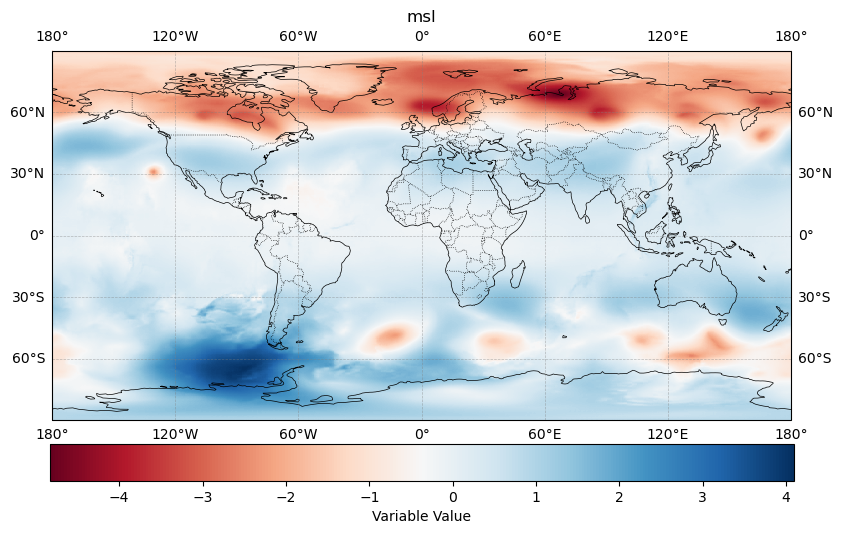

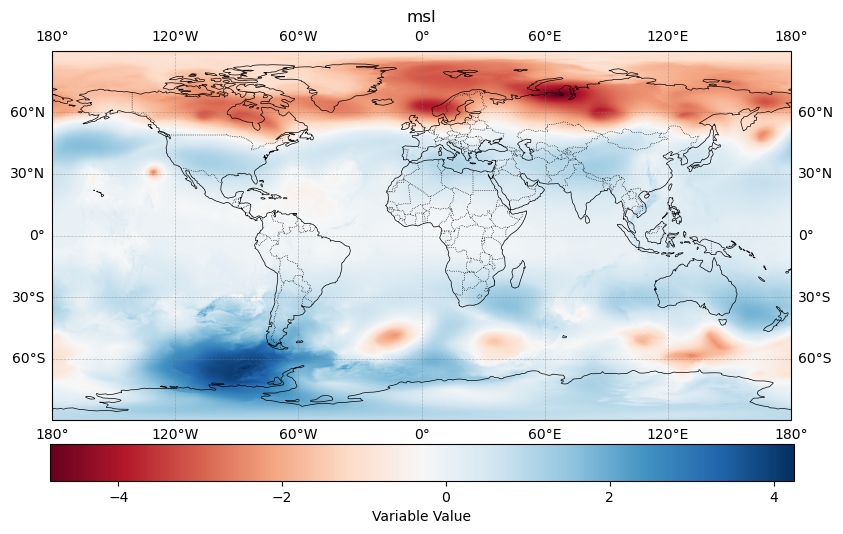

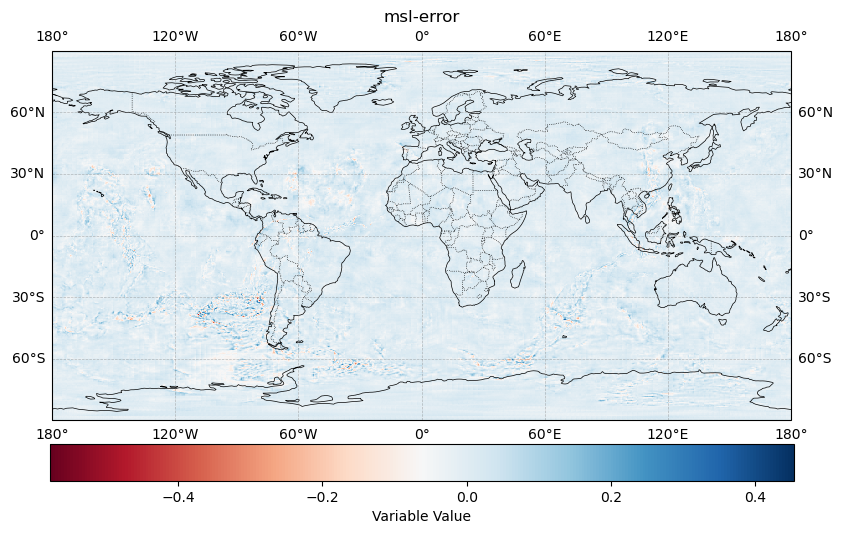

In [31]:
plot_sample(data[3*721:4*721,:],'msl','RdBu')
plot_sample(gtdata[3*721:4*721,:],'msl','RdBu')
plot_sample((data[3*721:4*721,:]-gtdata[3*721:4*721,:]),'msl-error','RdBu')

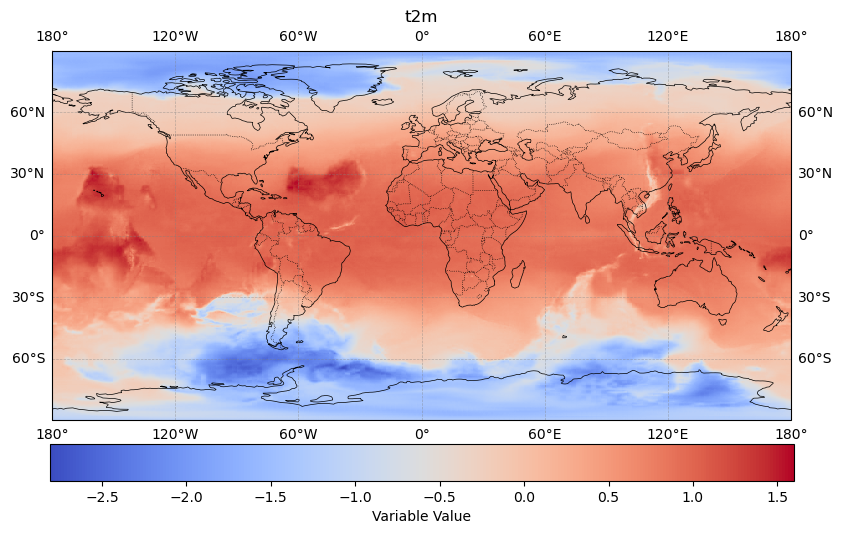

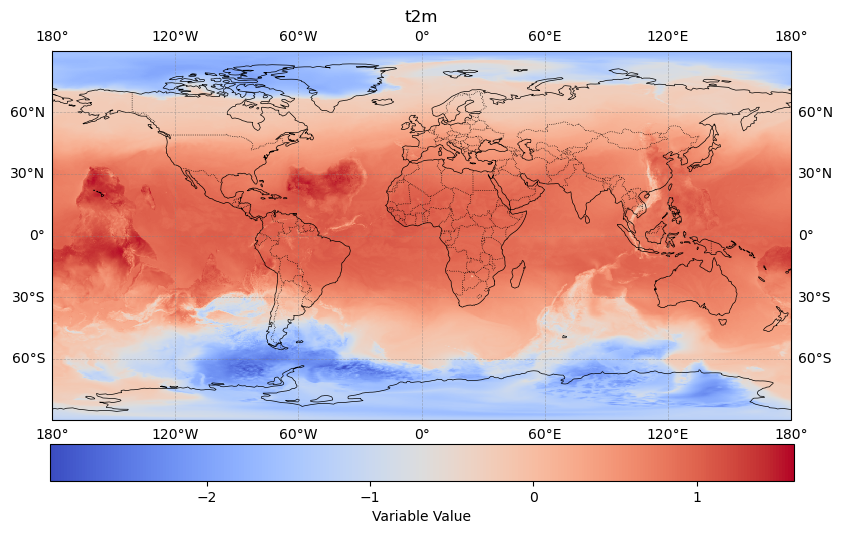

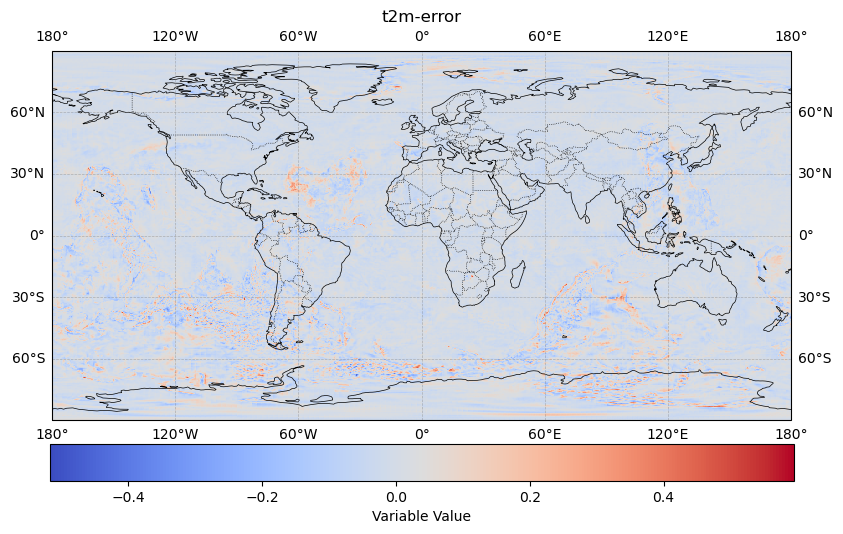

In [33]:
plot_sample(data[2*721:3*721,:],'t2m','coolwarm')
plot_sample(gtdata[2*721:3*721,:],'t2m','coolwarm')
plot_sample((data[2*721:3*721,:]-gtdata[2*721:3*721,:]),'t2m-error','coolwarm')

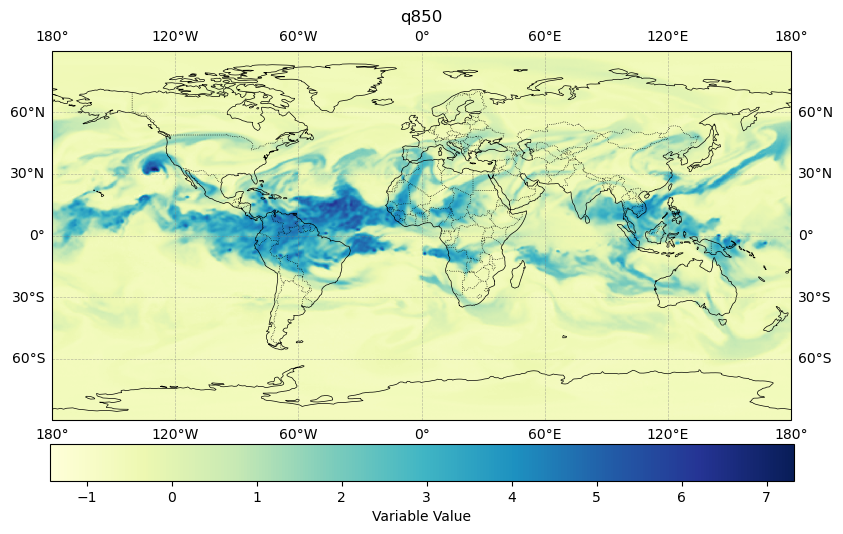

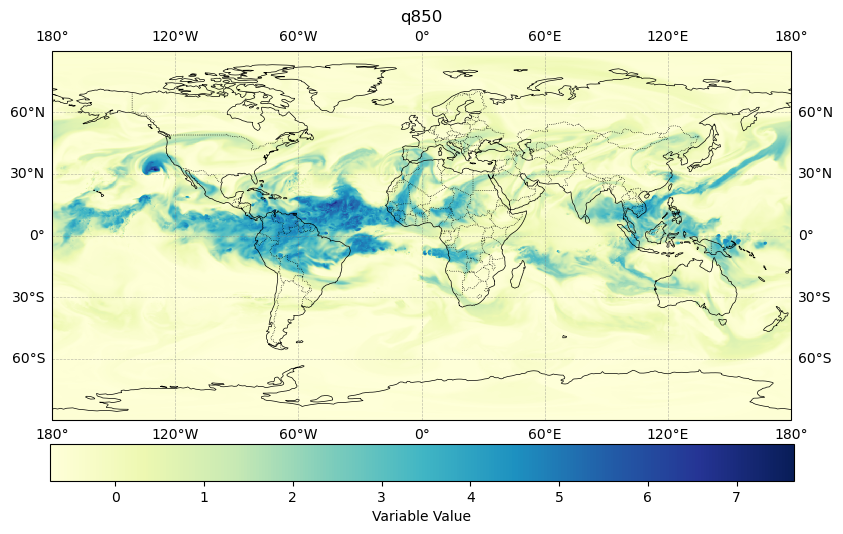

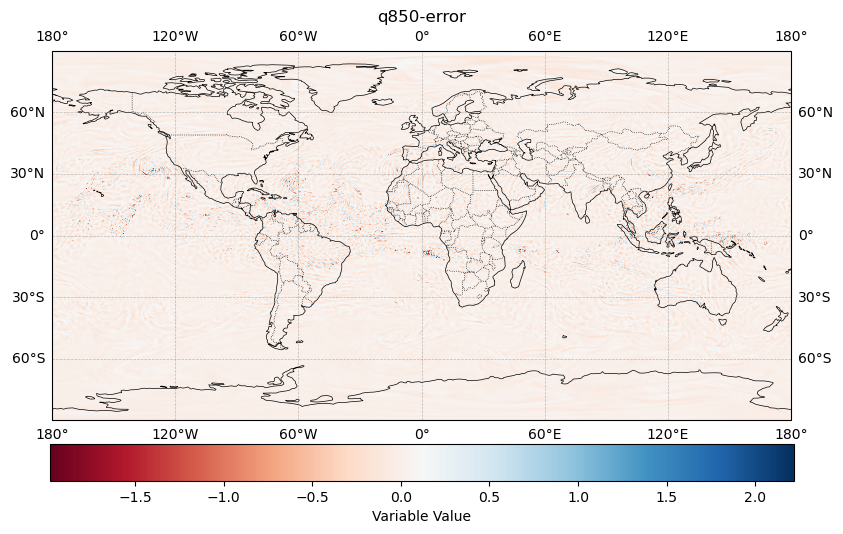

In [32]:
plot_sample(data[23*721:24*721,:],'q850','YlGnBu')
plot_sample(gtdata[23*721:24*721,:],'q850','YlGnBu')
plot_sample((data[23*721:24*721,:]-gtdata[23*721:24*721,:]),'q850-error','RdBu')

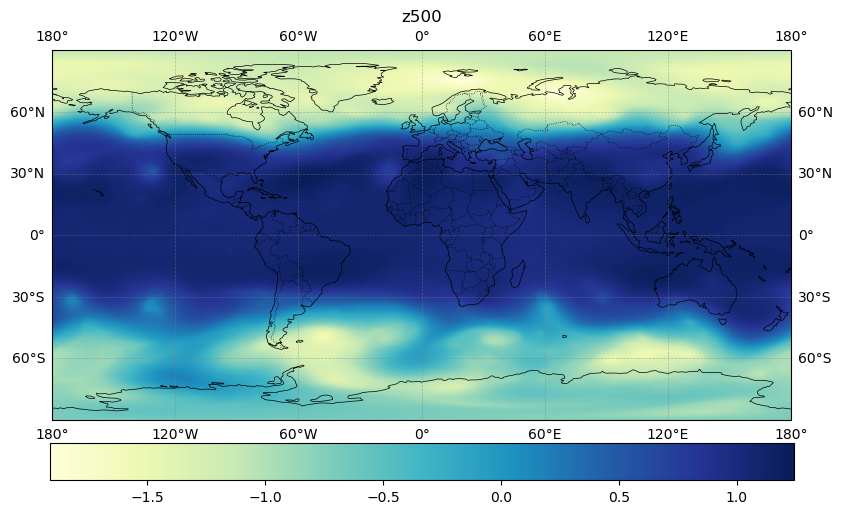

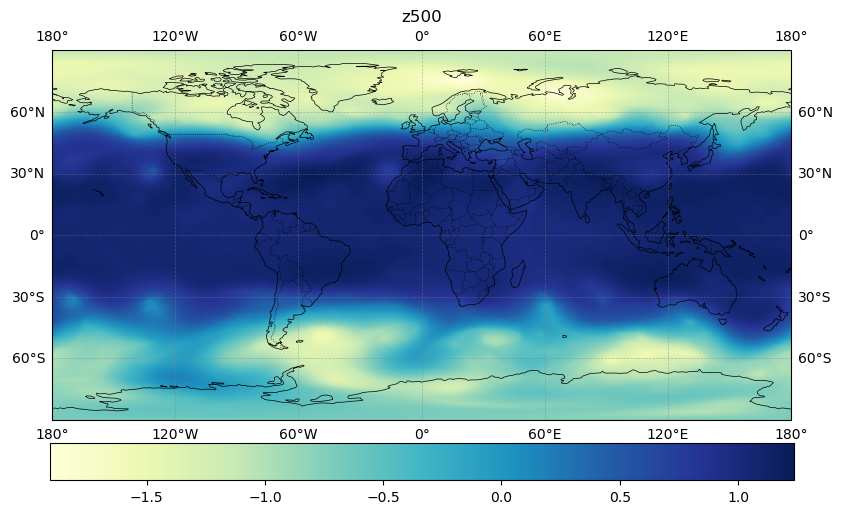

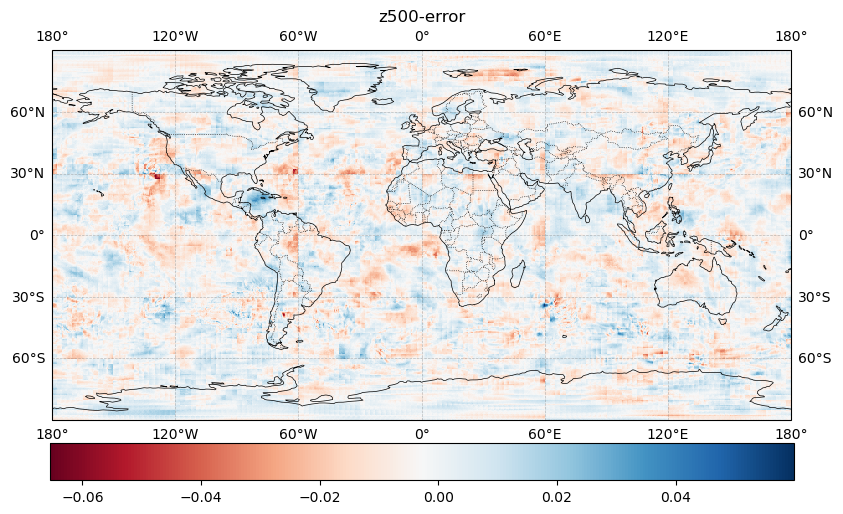

In [5]:
plot_sample(data[11*721:12*721,:],'z500','YlGnBu')
plot_sample(gtdata[11*721:12*721,:],'z500','YlGnBu')
plot_sample((data[11*721:12*721,:]-gtdata[11*721:12*721,:]),'z500-error','RdBu')